In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [3]:
df=pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
plt.rcParams['figure.figsize']=(18,8)


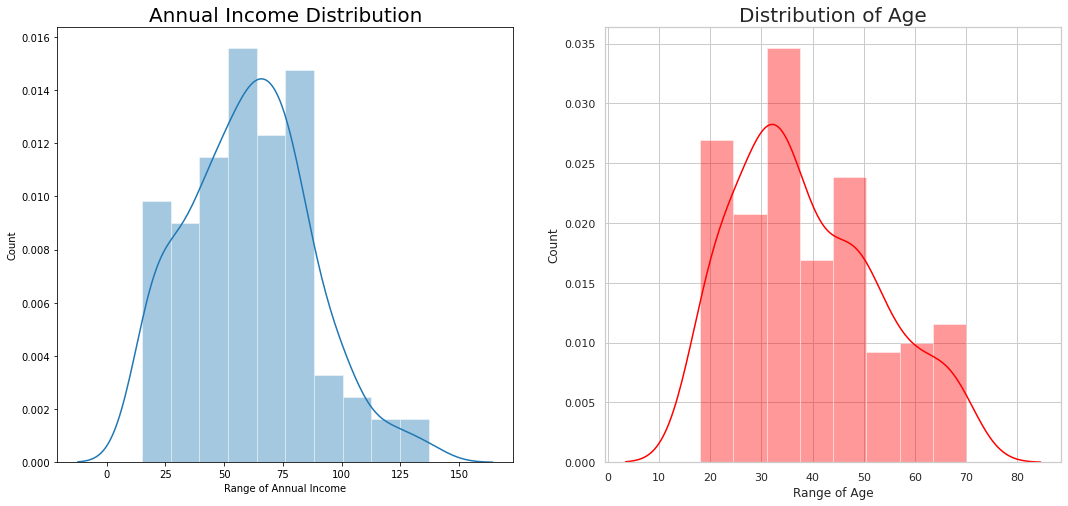

In [8]:
plt.subplot(1,2,1)
sns.set(style='whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Annual Income Distribution',fontsize=20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.set(style='whitegrid')
sns.distplot(df["Age"], color='red')
plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Range of Age')
plt.ylabel("Count")
plt.show()

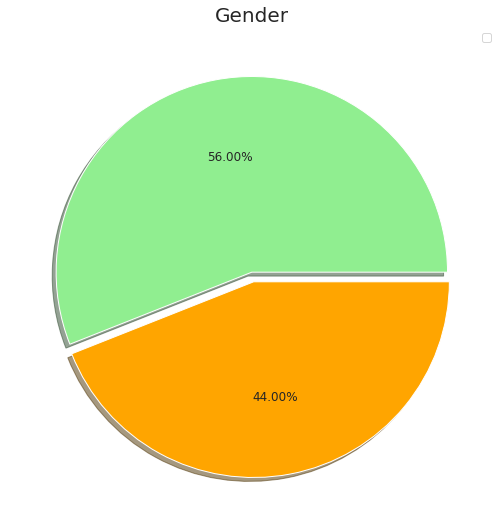

In [9]:
plt.rcParams['figure.figsize']=(9,9)
plt.pie(df["Gender"].value_counts(), colors=["lightgreen","orange"], explode=[0,0.05], shadow=True, autopct='%.2f%%')
plt.title("Gender",fontsize=20)
plt.axis('on')
plt.legend()
plt.show()

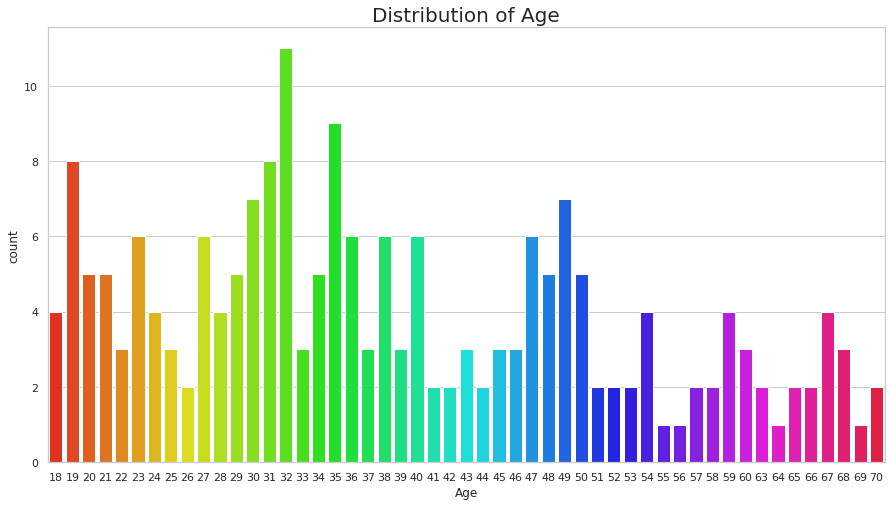

In [10]:
plt.rcParams["figure.figsize"]=(15,8)
sns.countplot(df["Age"], palette='hsv')
plt.title('Distribution of Age', fontsize=20)
plt.show()

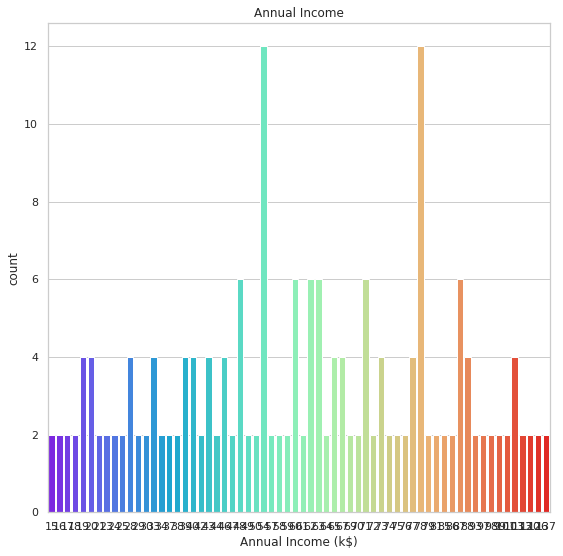

In [11]:
plt.rcParams["figure.figsize"]=(9,9)
sns.countplot(df['Annual Income (k$)'],palette='rainbow')
plt.title("Annual Income")
plt.show()

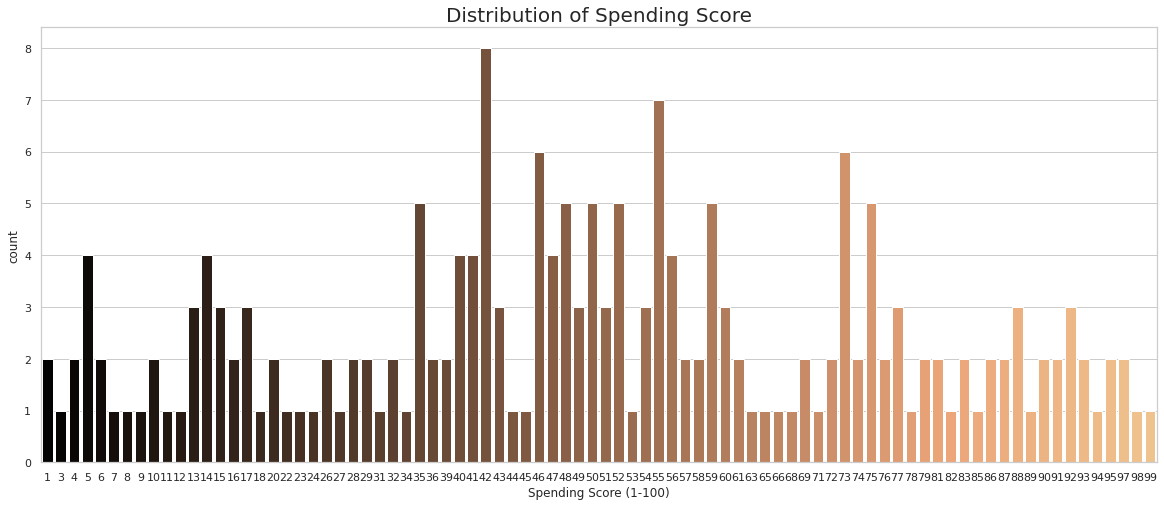

In [12]:
plt.rcParams['figure.figsize']=(20,8)
sns.countplot(df["Spending Score (1-100)"], palette='copper')
plt.title('Distribution of Spending Score', fontsize=20)
plt.show()

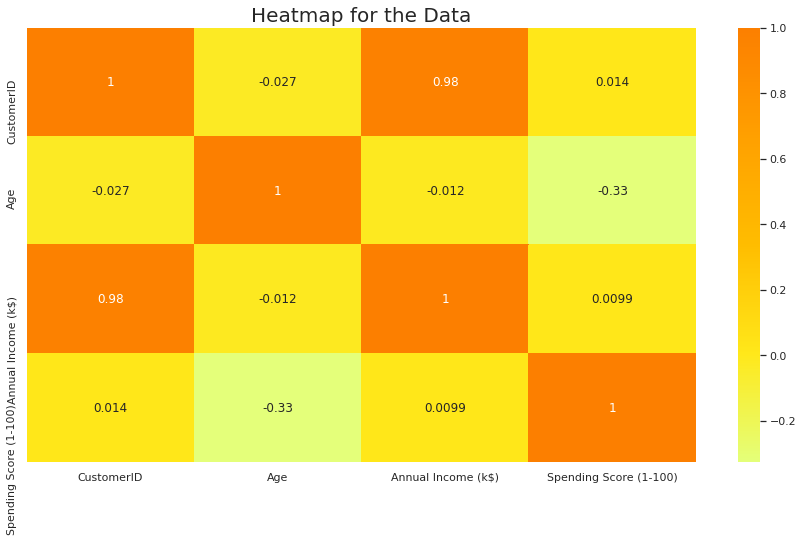

In [13]:
plt.rcParams['figure.figsize']=(15,8)
sns.heatmap(df.corr(),cmap='Wistia', annot=True)
plt.title('Heatmap for the Data', fontsize=20)
plt.show()

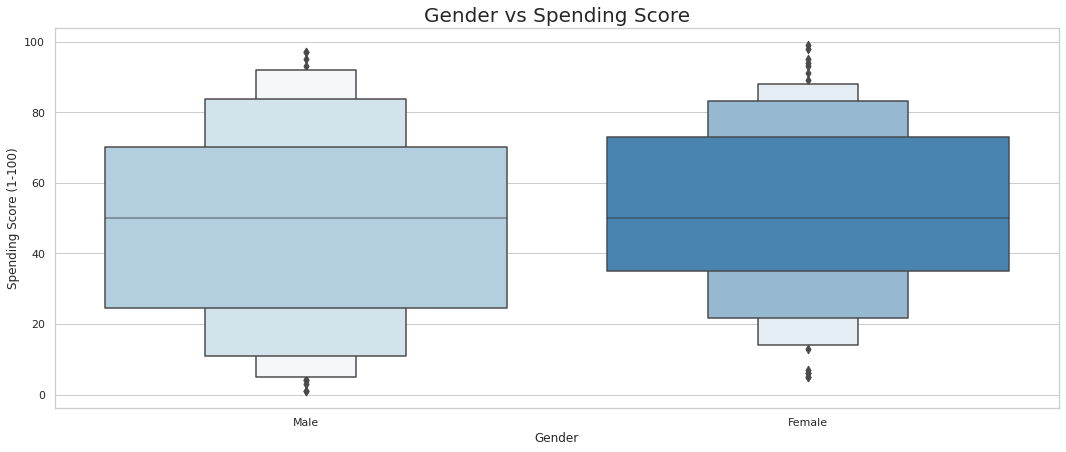

In [14]:
plt.rcParams['figure.figsize']=(18,7)
sns.boxenplot(df["Gender"], df["Spending Score (1-100)"], palette='Blues')
plt.title('Gender vs Spending Score', fontsize=20)
plt.show()

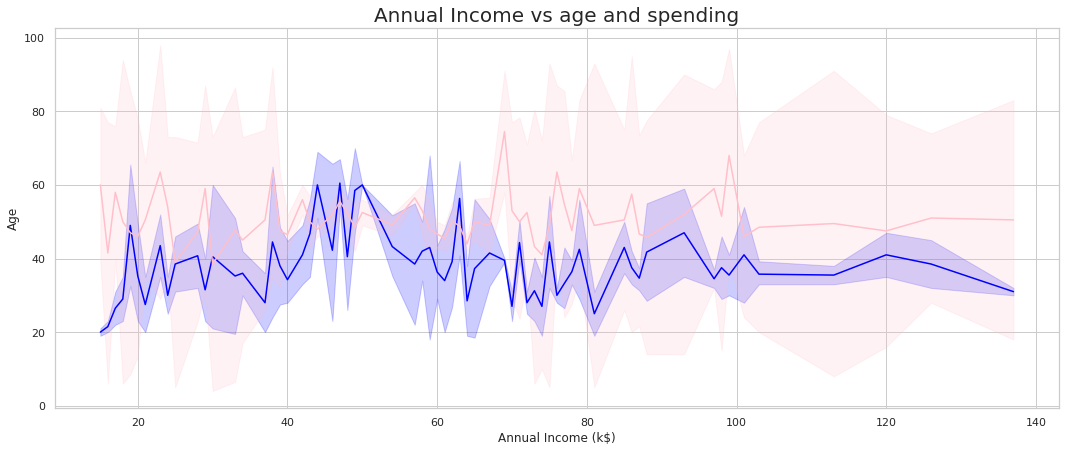

In [15]:
x=df['Annual Income (k$)']
y=df['Age']
z=df['Spending Score (1-100)']


sns.lineplot(x,y, color='blue')
sns.lineplot(x,z, color='pink')
plt.title('Annual Income vs age and spending', fontsize=20)
plt.show()

In [16]:
x=df.iloc[:,[3,4]].values

In [17]:
from sklearn.cluster import KMeans

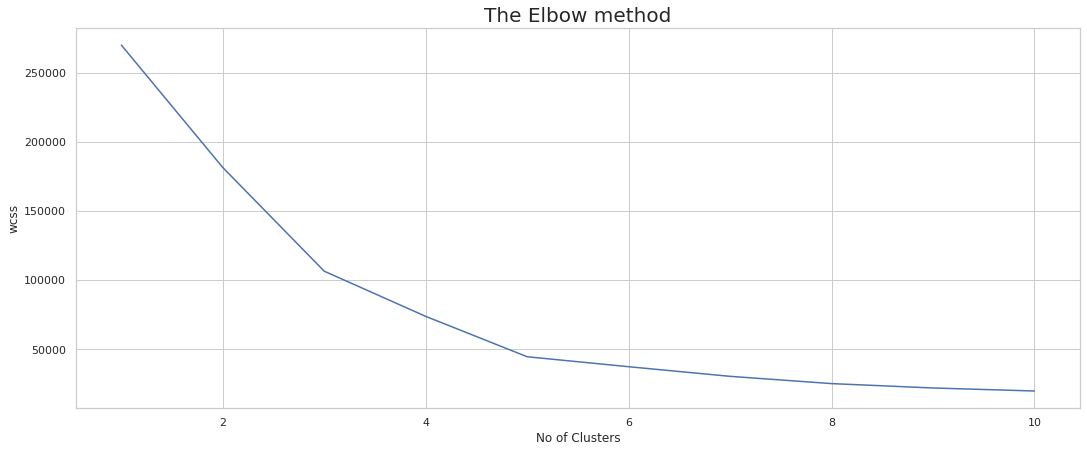

In [18]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("The Elbow method", fontsize=20)
plt.xlabel("No of Clusters")
plt.ylabel("wcss")
plt.show()

In [19]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

In [20]:
y_means

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [21]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=100,c='pink')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=100,c='yellow')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=100,c='cyan')
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=100,c='magenta')
plt.scatter(x[y_means==4,0],x[y_means==4,1],s=100,c='orange')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'